## Importar librerías

In [95]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Librerias

In [96]:
def crear_boxplots_seaborn_df(dataframe, col1, col2, col3):
    """
    Crea un gráfico de boxplot con tres subplots paralelos para las columnas de un DataFrame usando seaborn.
    """
    # Crear una figura y tres subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Boxplots de Tres Variables', fontsize=16)

    # Crear los boxplots con seaborn
    sns.boxplot(y=dataframe[col1], ax=axes[0])
    axes[0].set_title(col1)
    axes[0].set_ylabel('Valores')

    sns.boxplot(y=dataframe[col2], ax=axes[1])
    axes[1].set_title(col2)

    sns.boxplot(y=dataframe[col3], ax=axes[2])
    axes[2].set_title(col3)

    # Ajustar el diseño
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [97]:
def cap_outliers_at_75th_percentile(dataframe, variables):
    """
    Capea los valores de las columnas especificadas en el DataFrame al percentil 75.
    Para cada variable, todos los valores mayores al percentil 75 serán reemplazados por el valor del percentil.
    """
    df = dataframe.copy()  # Crear una copia para no modificar el original
    for var in variables:
        if var in df.columns:
            p75 = df[var].quantile(0.95)  # Calcular el percentil 75
            df[var] = df[var].apply(lambda x: min(x, p75))  # Imputar el valor del percentil 75
        else:
            print(f"Advertencia: {var} no se encuentra en el DataFrame.")
    return df

## Leer bases

In [98]:
ruta_base = "../input/base.parquet"

In [99]:
df = pd.read_parquet(ruta_base)

## Procesamiento

In [100]:
df = df.fillna(0)
df = df.replace([np.inf, -np.inf], 0)

In [101]:
df.shape

(382846, 31)

In [102]:
df["flg_churn"].value_counts(1)

flg_churn
0    0.880756
1    0.119244
Name: proportion, dtype: float64

In [103]:
df['tipo_producto'].value_counts()

tipo_producto
producto_a    288298
producto_c     85206
producto_b      9342
Name: count, dtype: int64

In [104]:
df = pd.get_dummies(df, columns=['tipo_producto'], prefix=None)

In [105]:
df["tipo_producto_producto_a"] = df["tipo_producto_producto_a"].astype(int)
df["tipo_producto_producto_b"] = df["tipo_producto_producto_b"].astype(int)
df["tipo_producto_producto_c"] = df["tipo_producto_producto_c"].astype(int)

In [106]:
df['segmento_cliente'].value_counts()

segmento_cliente
2     170440
3     118842
6      29607
5      26754
1      22561
10      9562
4       2950
7       1162
0        802
9         87
8         79
Name: count, dtype: int64

In [107]:
df = pd.get_dummies(df, columns=['segmento_cliente'], prefix='segmento')

In [108]:
df['segmento_1'] = df['segmento_1'].astype(int)
df['segmento_2'] = df['segmento_2'].astype(int)
df['segmento_3'] = df['segmento_3'].astype(int)
df['segmento_4'] = df['segmento_4'].astype(int)
df['segmento_5'] = df['segmento_5'].astype(int)
df['segmento_6'] = df['segmento_6'].astype(int)
df['segmento_7'] = df['segmento_7'].astype(int)
df['segmento_8'] = df['segmento_8'].astype(int)
df['segmento_9'] = df['segmento_9'].astype(int)
df['segmento_10'] = df['segmento_10'].astype(int)

## Tratamiento nulos

In [109]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

## Tratamiento outliers

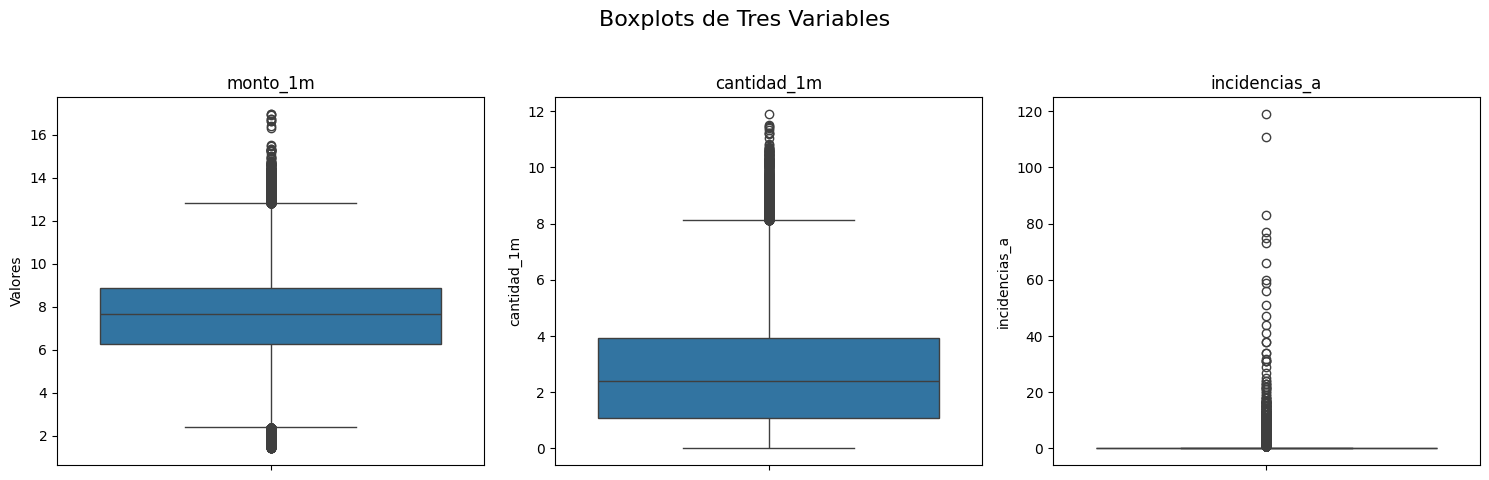

In [110]:
crear_boxplots_seaborn_df(df, 'monto_1m', 'cantidad_1m', 'incidencias_a')

In [111]:
variables_analizar_outliers = ['monto_1m', 'monto_2m', 'monto_3m', 'monto_4m',
       'monto_5m', 'monto_6m', 'cantidad_1m', 'cantidad_2m', 'cantidad_3m', 'cantidad_6m']

In [112]:
df = cap_outliers_at_75th_percentile(df, variables_analizar_outliers)

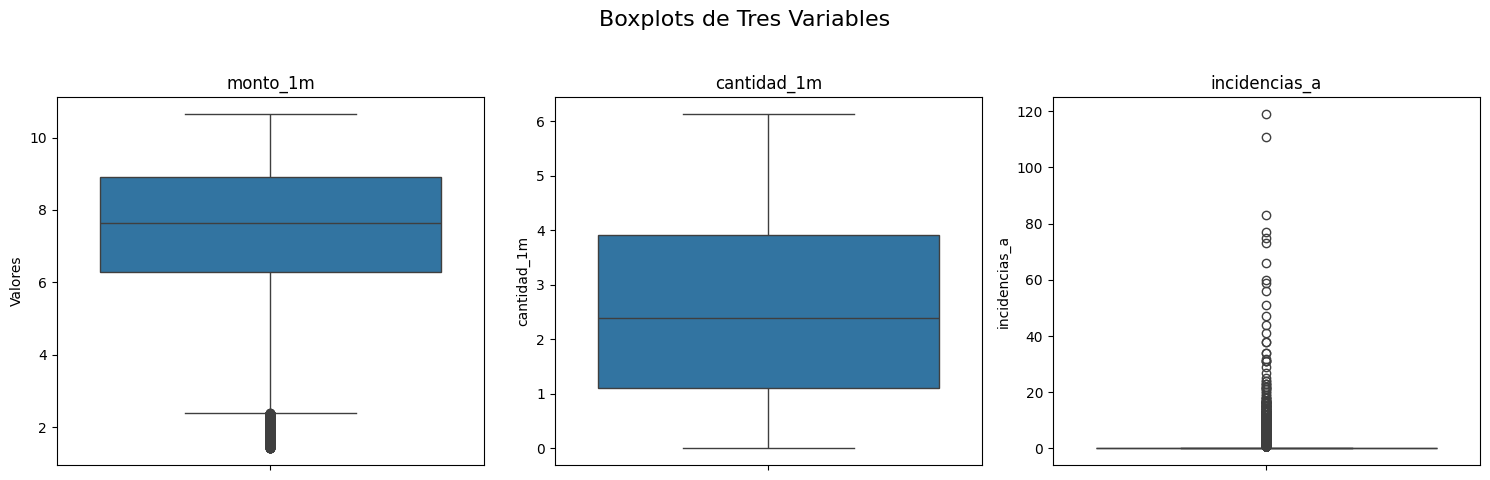

In [113]:
crear_boxplots_seaborn_df(df, 'monto_1m', 'cantidad_1m', 'incidencias_a')

## Segmento alto valor

In [114]:
df['monto_1m'].describe()

count    382846.000000
mean          7.545137
std           1.849369
min           1.410987
25%           6.292395
50%           7.649693
75%           8.899935
max          10.648193
Name: monto_1m, dtype: float64

In [115]:
df['cantidad_1m'].describe()

count    3.828460e+05
mean     2.639960e+00
std      1.779600e+00
min      1.000000e-07
25%      1.098612e+00
50%      2.397895e+00
75%      3.912023e+00
max      6.129050e+00
Name: cantidad_1m, dtype: float64

In [118]:
cond_alto_valor = (df["monto_1m"]>8.5) & (df["cantidad_1m"]>3.5)

In [119]:
df_alto_valor = df[cond_alto_valor]

## Exportar bases

In [120]:
df.to_parquet("../input/base_modelo.parquet")

In [121]:
df_alto_valor.to_parquet("../input/base_modelo_alto_valor.parquet")